# Perform Clustering to Reduce a VQ Codebook

Copyright (c) 2021 Herman Kamper, MIT License.

By applying hierarchical clustering, the VQ codebook is in effect reduced. The reduced codebook is saved.

## Preliminaries

In [1]:
from pathlib import Path
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial import distance
from sklearn.cluster import AgglomerativeClustering, KMeans
from tqdm import tqdm
import numpy as np
import pylab as plt
import sys

sys.path.append("..")

## Read VQ codebook

In [2]:
vq_model = "resdavenet_vq"
dataset = "buckeye"

# Paths
embedding_fn = (
    Path("../exp")/vq_model/dataset/"embedding.npy"
    )

In [3]:
print("Reading: {}".format(embedding_fn))
embedding = np.load(embedding_fn)

Reading: ../exp/resdavenet_vq/buckeye/embedding.npy


In [4]:
# Filter very small codes
tmp = []
for embed in embedding:
    if not np.linalg.norm(embed) < 1e-9:
        tmp.append(embed)
embedding_filtered = np.vstack(tmp)
print("Embedding shape:", embedding_filtered.shape)

Embedding shape: (498, 256)


## Cluster and visualize VQ codebook

Codebook shape: (498, 256)


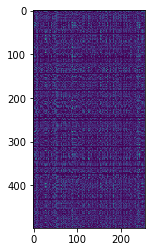

In [5]:
plt.imshow(embedding_filtered, interpolation="nearest")
print("Codebook shape:", embedding_filtered.shape)

In [6]:
n_clusters = 50
# clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
# clustering = KMeans(n_clusters=n_clusters)
clustering = clustering.fit(embedding_filtered)

clusters = clustering.labels_

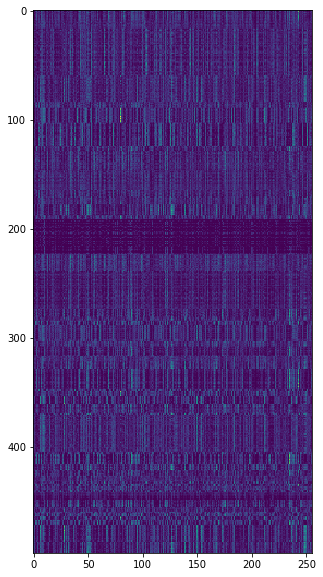

In [7]:
# Sort according to cluster and plot
X = []
embedding_reduced = []
for i_cluster in range(n_clusters):
    X.append(embedding_filtered[np.where(clusters == i_cluster)[0]])
    embedding_reduced.append(np.mean(
        embedding_filtered[np.where(clusters == i_cluster)[0]], axis=0
        ))
X = np.vstack(X)
embedding_reduced = np.vstack(embedding_reduced)
plt.figure(figsize=(5, 10))
plt.imshow(X, interpolation="nearest")

In [8]:
embedding_reduced.shape

(50, 256)

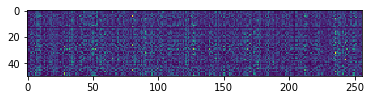

In [9]:
plt.imshow(embedding_reduced, interpolation="nearest")

In [62]:
embedding_reduced_fn = (
    Path("../exp")/"resdavenet_vq_clust50"/dataset/"embedding.npy"
    )
print("Writing:", embedding_reduced_fn)
np.save(embedding_reduced_fn, embedding_reduced)

Writing: ../exp/resdavenet_vq_hierarch/buckeye/embedding.npy
